## Sleep Tests

In [493]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [3]:
def plot_hist(log,b=1000):
    with open(log) as f:
        lines = f.readlines()
        y = []
        for line in lines:
            y.append(float(line.split()[0]))

    #plt.xscale('log')
    plt.xlabel("t")
    plt.hist(y,bins=b,color="red")
    plt.show()

### Sleep 0.2

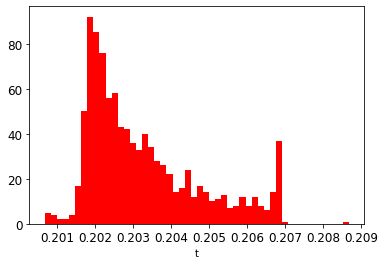

In [7]:
plot_hist("comparision_tests/logs/sleep_0.2.txt",50)

In [8]:
def plot_perf(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            time = float(line.split()[1])
            x.append(m)
            y.append(m/time)
            
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("t")
    plt.ylabel("delta")
    plt.plot(x,y,'.',color='grey')

### Sleep 0.2 - 2

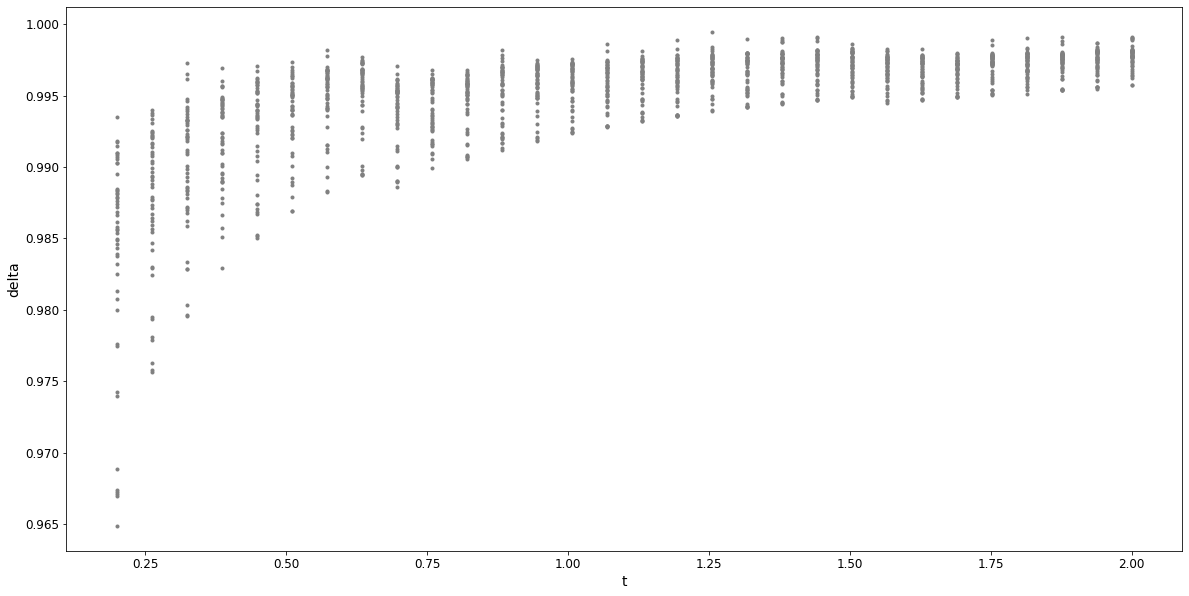

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
plot_perf("comparision_tests/logs/sleep_multi.txt")

In [19]:
def plot_time(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            time = float(line.split()[1])
            x.append(m)
            y.append(time)
            
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("t")
    plt.ylabel("delta")
    plt.plot(x,y,'.',color='grey')

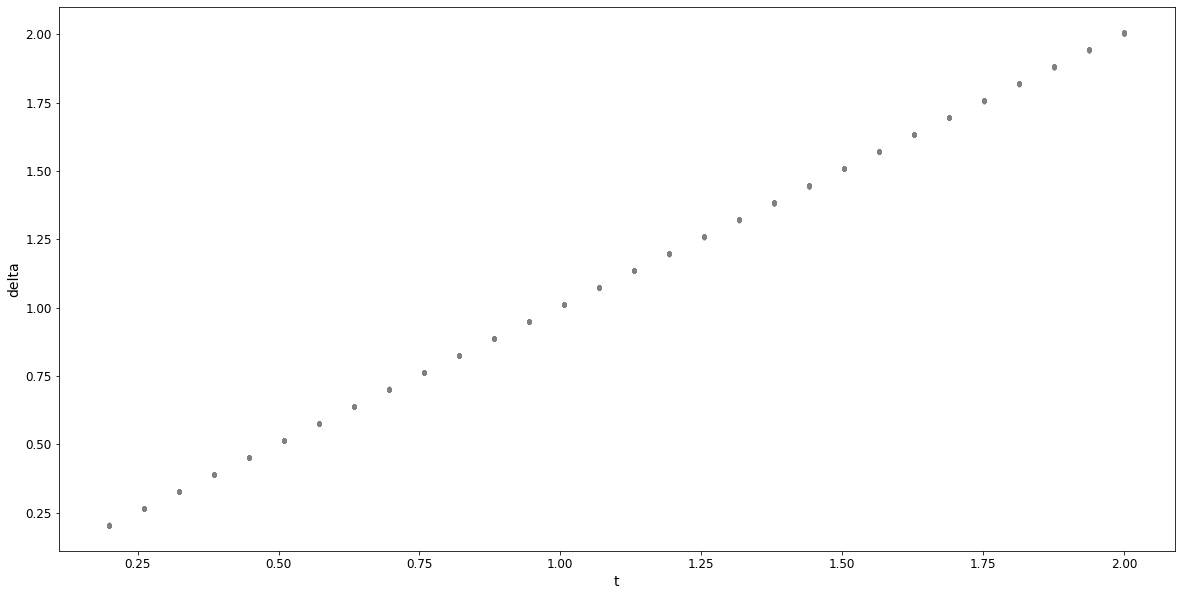

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
plot_time("comparision_tests/logs/sleep_multi.txt")

### Sleep 0.2 - 0.3

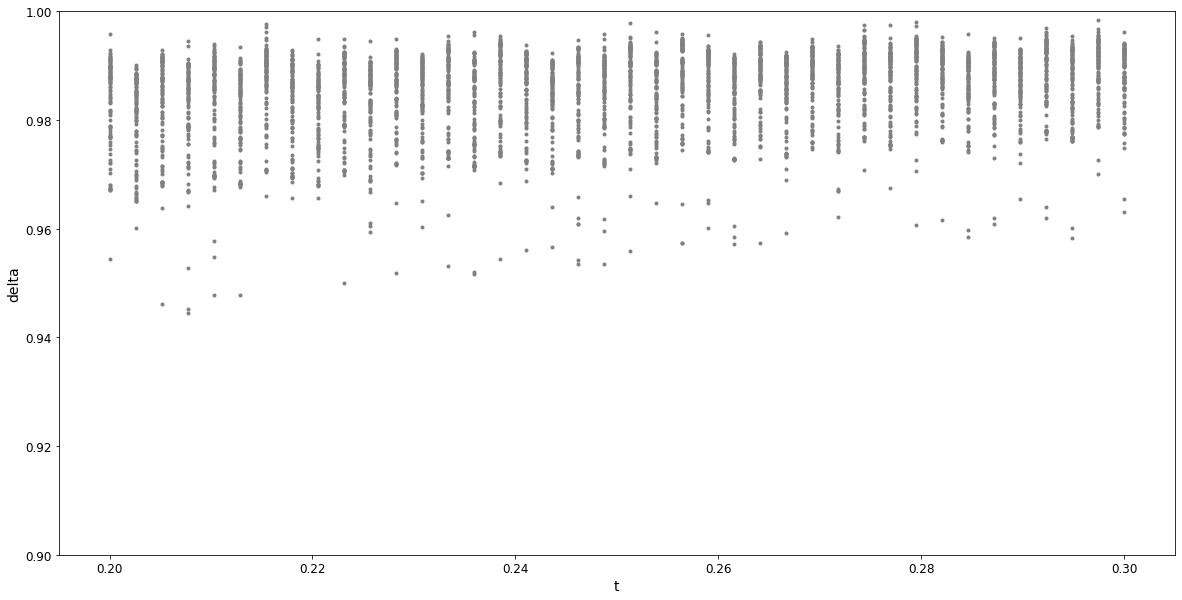

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0.9,1.0)
plot_perf("comparision_tests/logs/sleep_multi-0.2-0.3.txt")

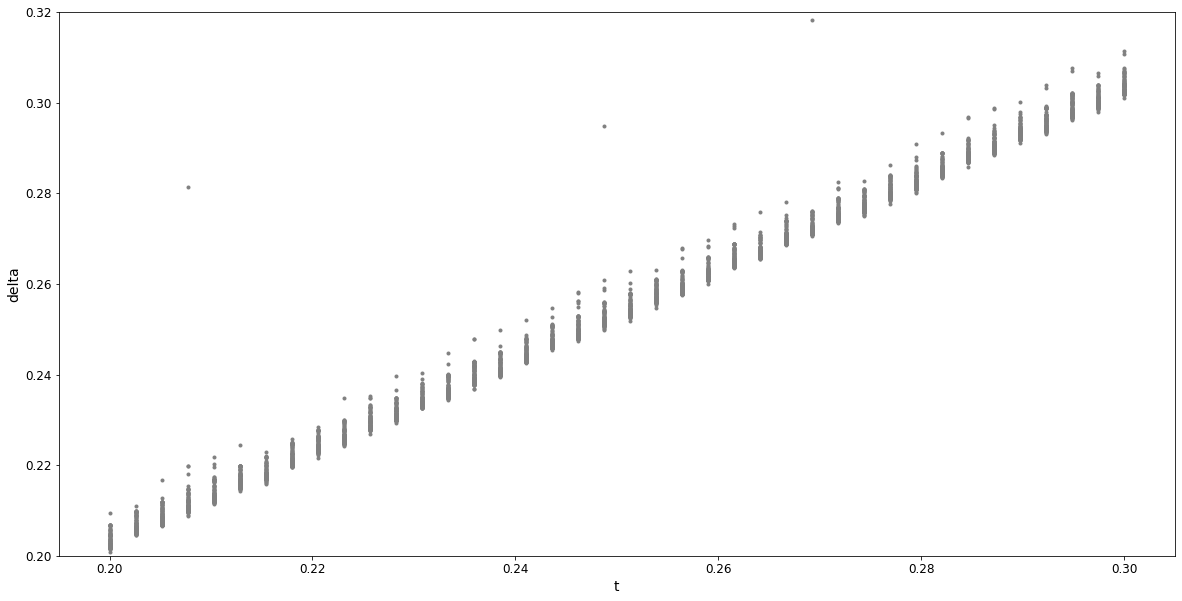

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0.2,0.32)
plot_time("comparision_tests/logs/sleep_multi-0.2-0.3.txt")

### Sleep 0.2 - 0.205

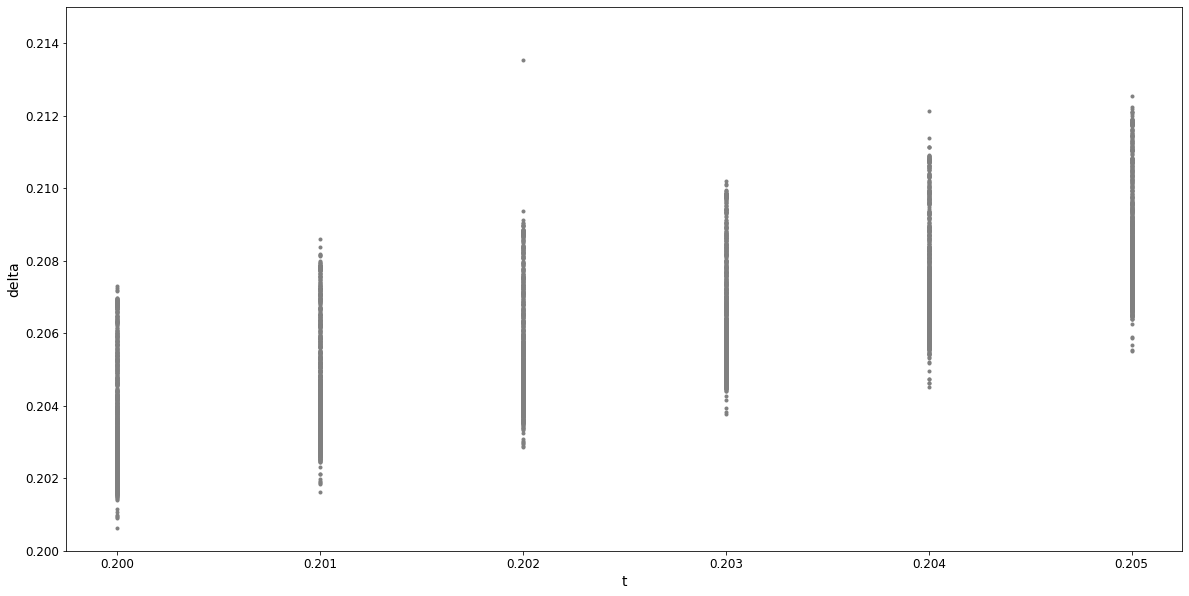

In [30]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0.2,0.215)
plot_time("comparision_tests/logs/sleep_multi-0.2-0.205.txt")

In [32]:
def get_dict_for_hist(log):
    with open(log) as f:
        lines = f.readlines()
        d = {}
        for line in lines:
            k = float(line.split()[0])
            try:
                d[k].append(float(line.split()[1]))
            except KeyError:
                d[k] = []
                d[k].append(float(line.split()[1]))

    return d

In [34]:
d = get_dict_for_hist("comparision_tests/logs/sleep_multi-0.2-0.205.txt")

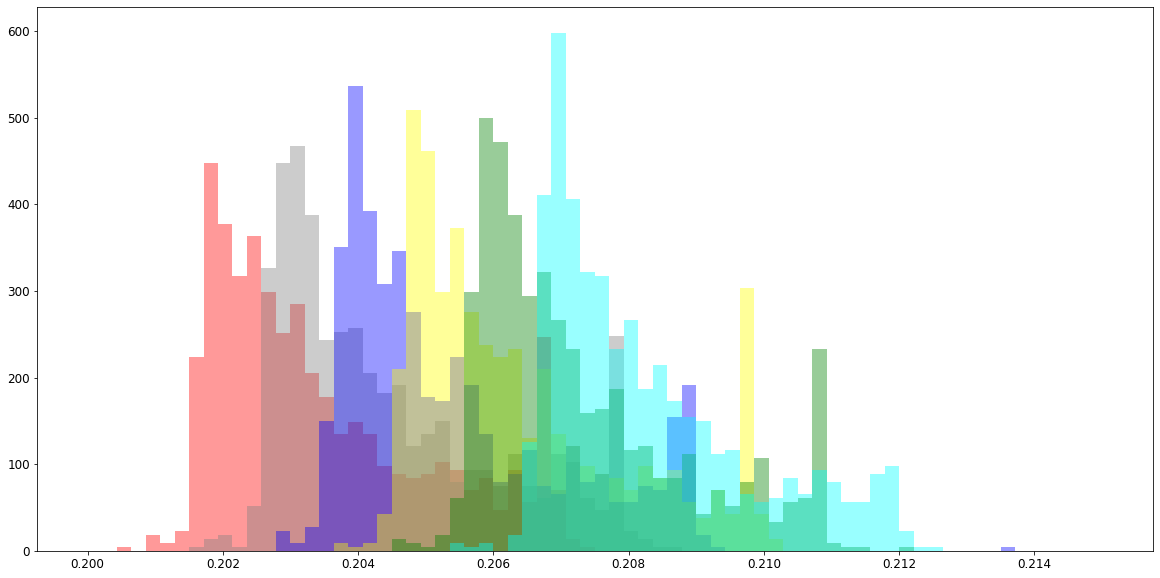

In [73]:
l=0.2
u=0.215
plt.hist(d[0.2],bins=70,color="red",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.201],bins=70,color="grey",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.202],bins=70,color="blue",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.203],bins=70,color="yellow",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.204],bins=70,color="green",density=True,range=(l,u),alpha=0.4)
plt.hist(d[0.205],bins=70,color="cyan",density=True,range=(l,u),alpha=0.4)
plt.show()

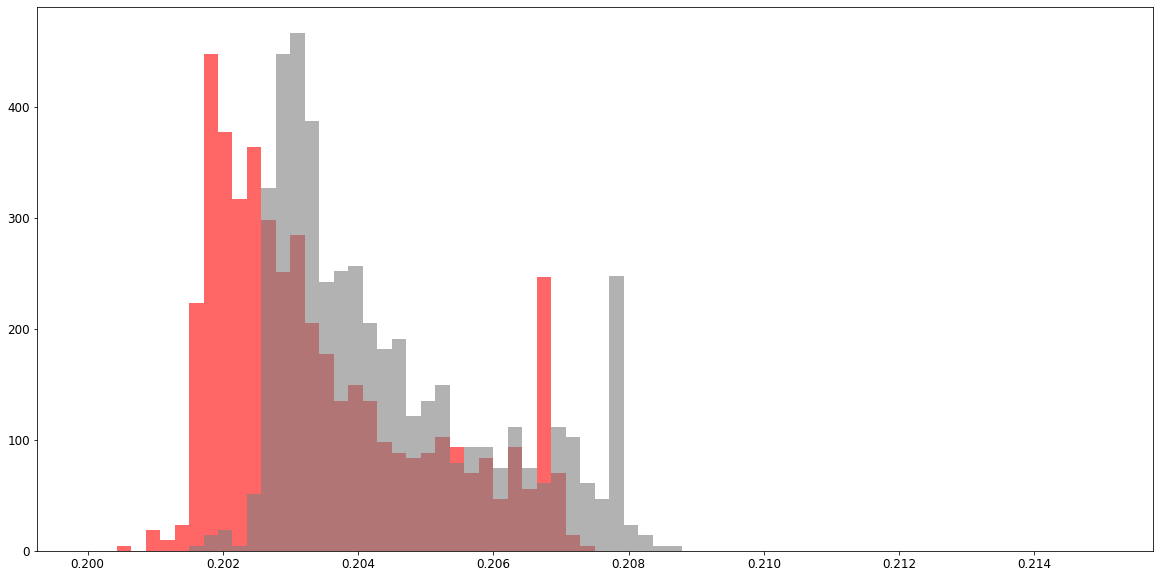

In [68]:
plt.hist(d[0.2],bins=70,color="red",density=True,range=(l,u),alpha=0.6)
plt.hist(d[0.201],bins=70,color="grey",density=True,range=(l,u),alpha=0.6)
plt.show()

### Comparision Strategies

In [233]:
S = 20
K = 5
M = 10
THRESH = 0.60
stat = np.min

In [247]:
def PH1(d1,d2):
    N = 1000
    h1 = 0
    for i in range(N):
        A = random.sample(d1,S)
        B = random.sample(d2,S)
        c = 0
        for j in range(M):
            tA = stat(random.sample(A,K))
            tB = stat(random.sample(B,K))
            if tA < tB:
                c+=1
        c = float(c/M) #E[tA < tB]
        if c>THRESH: #E[tA < tB] > THRESH
            h1+= 1
    p_h1 = float(h1/N) #P(H1) = P(E[tA < tB] > THRESH) when M = 1 => P(H1) = E[tA < tB]
    return p_h1


### Different distributions

#### Strategy B

In [390]:
S = 20
K = 4
M = 10
THRESH = 0.51
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.201]))

P(H1) =  0.992


#### Strategy A

In [364]:
S = 20
K = S
M = 1
THRESH = 0.51
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.201]))

P(H1) =  0.99


#### Effect of sample size - Strategy A vs Strategy B

In [402]:
sample_sizes = [s for s in range(5,100,5)]
stat = np.min
THRESH = 0.51
y_ph1 = []
for s in sample_sizes:
    S = s
    K = S
    M = 1
    y_ph1.append(PH1(d[0.2],d[0.201]))

In [404]:
sample_sizes = [s for s in range(5,100,5)]
stat = np.min
THRESH = 0.51
y_ph2 = []
for s in sample_sizes:
    S = s
    K = 4
    M = 10
    y_ph2.append(PH1(d[0.2],d[0.201]))

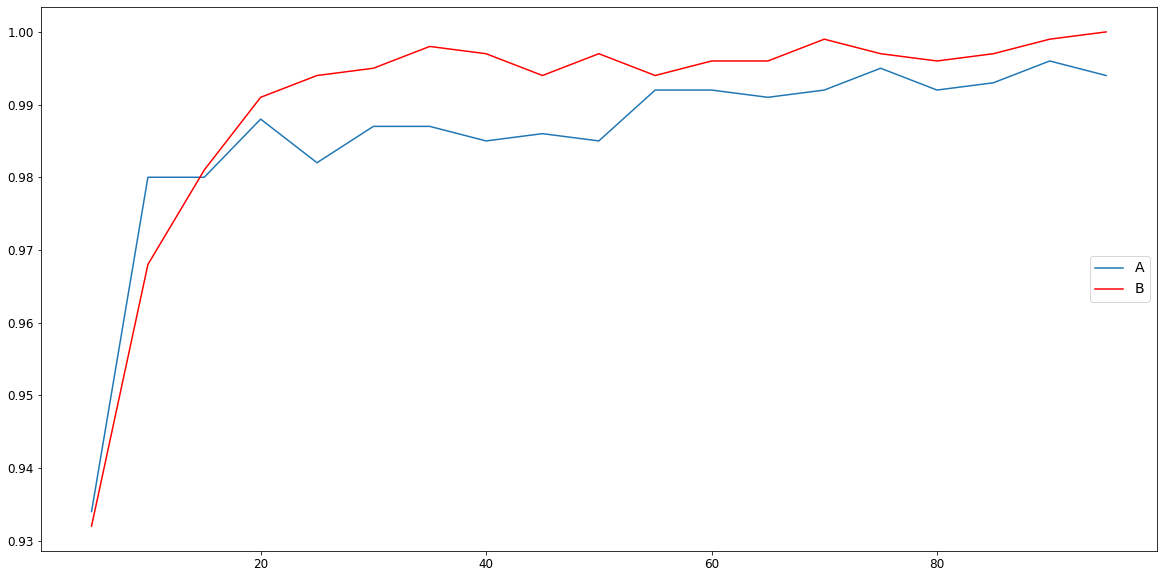

In [412]:
plt.plot(sample_sizes,y_ph1,label="A")
plt.plot(sample_sizes,y_ph2,'r',label="B")
plt.legend(loc="right")
plt.show()

### Same distribution

#### Strategy B

In [385]:
S = 20
K = 4
M = 10
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.2]))

P(H1) =  0.259


#### Strategy A

In [256]:
S = 20
K = S
M = 1
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d[0.2],d[0.2]))

P(H1) =  0.501


### Same Distribution (Realistic)

In [269]:
d1 = get_dict_for_hist("comparision_tests/logs/sleep_multi-0.2-0.201.txt")

**min interval - 0.2, 0.201 - anything inbetween is rounded off**

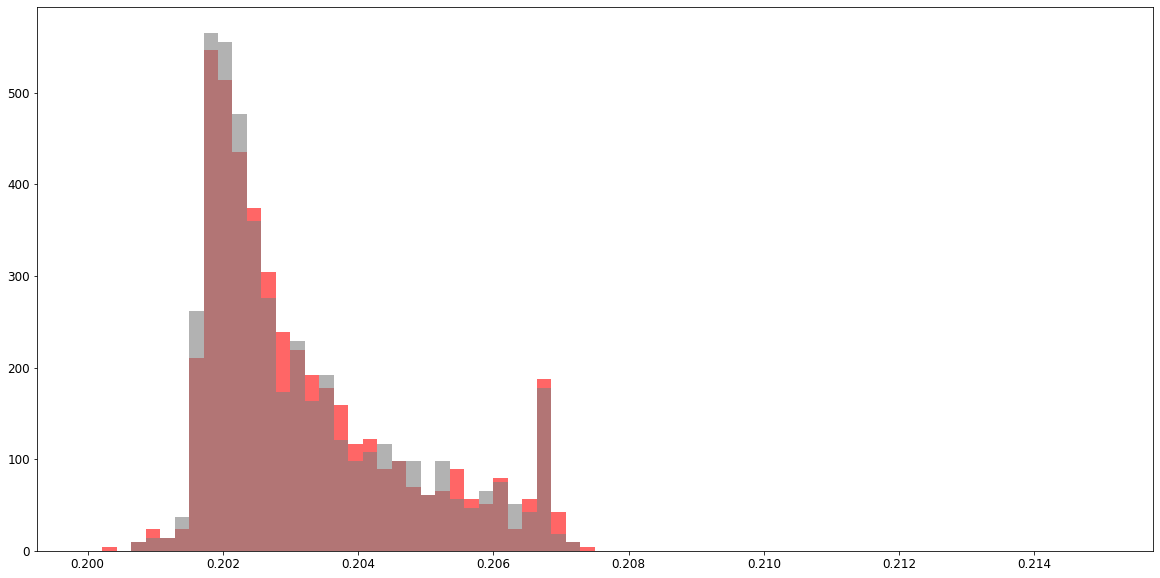

In [483]:
l=0.2
u=0.215
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(d1[0.2],bins=70,color="red",density=True,range=(l,u),alpha=0.6)
plt.hist(d1[0.2002],bins=70,color="grey",density=True,range=(l,u),alpha=0.6)
plt.show()

#### Strategy B

In [306]:
S = 20
K = 1
M = 20
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d1[0.2],d1[0.2002]))

P(H1) =  0.148


#### Strategy A

In [268]:
S = 20
K = S
M = 1
THRESH = 0.60
stat = np.min
print("P(H1) = ", PH1(d1[0.2],d1[0.2002]))

P(H1) =  0.512


In [416]:
S_sample_sizes = [s for s in range(5,100,5)]
stat = np.min
THRESH = 0.60
S_y_ph1 = []
for s in sample_sizes:
    S = s
    K = S
    M = 1
    S_y_ph1.append(PH1(d1[0.2],d1[0.2002]))

In [414]:
S_sample_sizes = [s for s in range(5,100,5)]
stat = np.min
THRESH = 0.60
S_y_ph2 = []
for s in sample_sizes:
    S = s
    K = 4
    M = 10
    S_y_ph2.append(PH1(d1[0.2],d1[0.2002]))

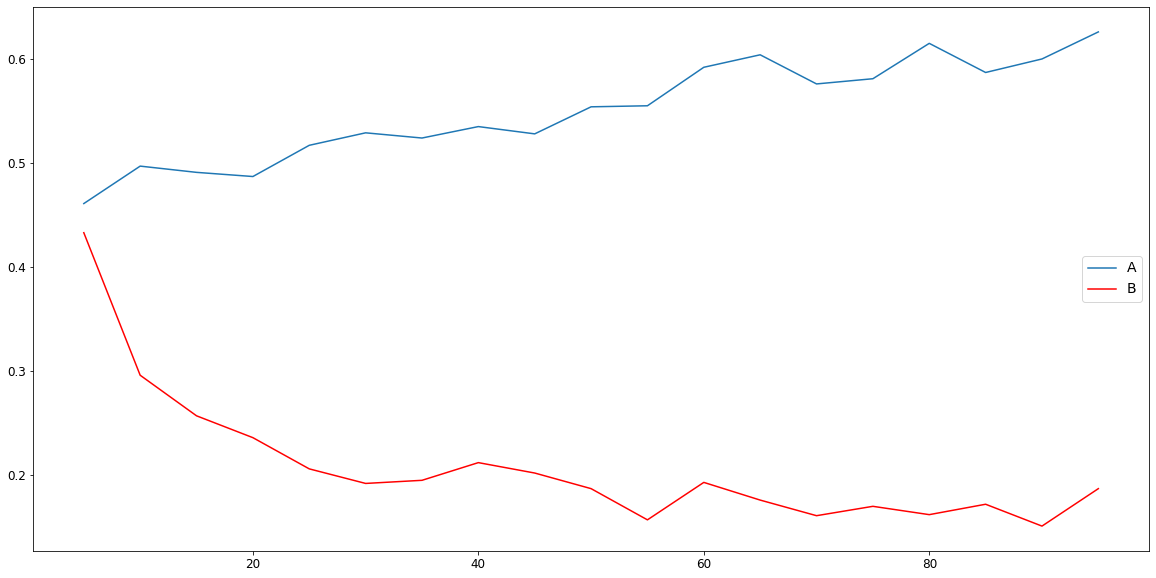

In [417]:
plt.plot(S_sample_sizes,S_y_ph1,label="A")
plt.plot(S_sample_sizes,S_y_ph2,'r',label="B")
plt.legend(loc="right")
plt.show()

### Generating skewed distributions

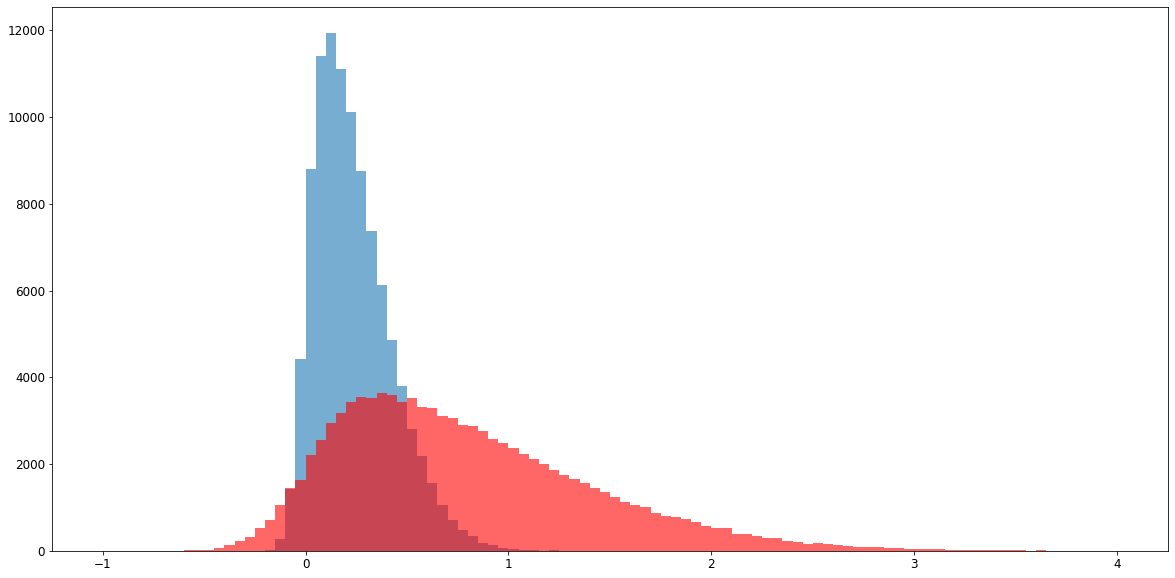

In [479]:
NUM_SAMPLES = 100000

def randn_skew_fast(N, alpha=0.0, loc=0.0, scale=1.0):
    sigma = alpha / np.sqrt(1.0 + alpha**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1

# lets check again
l = -1
u = 4
plt.hist(randn_skew_fast(NUM_SAMPLES, 5,scale=0.3),bins=100,range=(l,u),alpha=0.6)
plt.hist(randn_skew_fast(NUM_SAMPLES, 5),bins=100,range=(l,u),alpha=0.6,color='r')
plt.show()

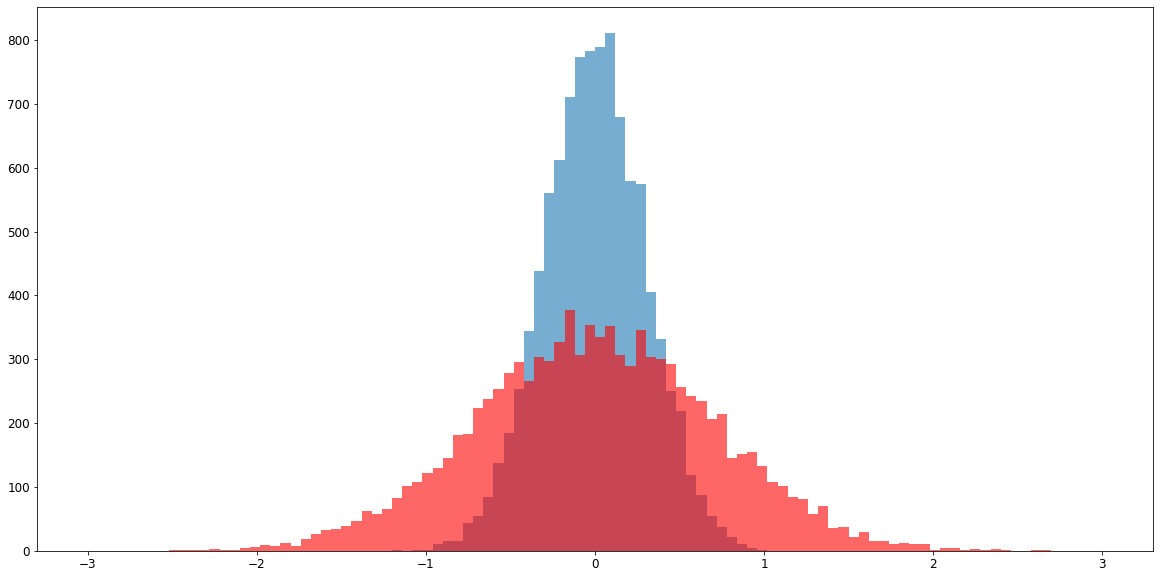

In [470]:
N = 10000
l=-3
u=3
plt.hist(0.3*np.random.randn(N),bins=100,range=(l,u),alpha=0.6)
plt.hist(0.7*np.random.randn(N),bins=100,range=(l,u),color='r',alpha=0.6)
plt.show()

### Variance vs Sample size plot

In [589]:
xx = randn_skew_fast(10000, 5,scale=0.3)
print(statistics.variance(xx))
print(np.var(xx))

0.0347622171162386
0.03475874089452697


In [596]:
def var_sample_plot(scale):
    sample_sizes = [s for s in range(10,200,5)]
    T = 500
    true_var = np.var(randn_skew_fast(100000, 5,scale=scale))
    vv = []
    for s in sample_sizes:
        v = []
        for i in range(T):
            xx = randn_skew_fast(s, 5,scale=scale)
            v.append(np.var(xx))
        vv.append(np.mean(v))
    plt.plot(sample_sizes,abs(np.array(vv)-true_var),label=str("{0:.2f}".format(true_var)))
    return true_var

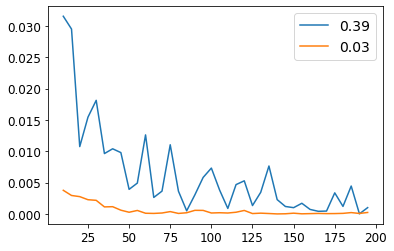

In [601]:
var_sample_plot(1.0)
var_sample_plot(0.3)
#plt.yscale('log')
plt.legend()
plt.show()

### Proportion sampling

In [603]:
dA  = randn_skew_fast(NUM_SAMPLES, 5,scale=0.3)
dB  = randn_skew_fast(NUM_SAMPLES, 5)
varA = 0.03
varB = 0.4    
min_runs = 5

In [608]:
prop = float(varB/varA)
sA = min_runs
sB = int(prop*min_runs)

In [613]:
T = 250
edA = []
edB = []
while T>0:
    edA = random.sample(list(dA),sA) + edA
    edB = random.sample(list(dB),sB) + edB
    T = T - 50    

In [615]:
len(edA), len(edB)

(25, 330)

(array([  0.,  23.,  98., 106.,  64.,  23.,  11.,   4.,   1.,   0.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Patch objects>)

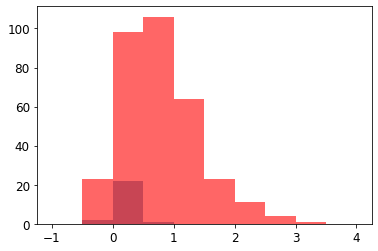

In [616]:
l = -1
u = 4
plt.hist(edA,range=(l,u),alpha=0.6)
plt.hist(edB,range=(l,u),alpha=0.6,color='r')

In [738]:
def prop_sample_PH1(dA,dB,min_runs=5,budget=250):
    varA = np.var(dA)
    varB = np.var(dB)
    if varA > varB:
        prop = float(varA/varB)
        sB = min_runs
        sA = int(prop*min_runs)
    else:
        prop = float(varB/varA)
        sA = min_runs
        sB = int(prop*min_runs)
    
        
    N = 200
    h1 = 0
    for i in range(N):
        edA = []
        edB = []
        T = budget
        while T>0:
            edA = random.sample(list(dA),sA) + edA
            edB = random.sample(list(dB),sB) + edB
            T = T - 50
        c = 0

        kA = min(max(3,int(0.25*len(edA))),4)
        kB = min(max(3,int(0.25*len(edB))),4)
        if M == 1:
            kA = len(edA)
            kB = len(edB)
            
        for j in range(M):
            tA = stat(random.sample(edA,kA))
            tB = stat(random.sample(edB,kB))
            if tA < tB:
                c+=1
        c = float(c/M) #E[tA < tB]
        if c>THRESH: #E[tA < tB] > THRESH
            h1+= 1
    p_h1 = float(h1/N) #P(H1) = P(E[tA < tB] > THRESH) when M = 1 => P(H1) = E[tA < tB]
    return {"ph1":p_h1, "varA":varA, "varB":varB, "sA":sA, "sB":sB, "edA":len(edA), "edB":len(edB), "kA":kA, "kB":kB}

### Example 1 - min and median overlap

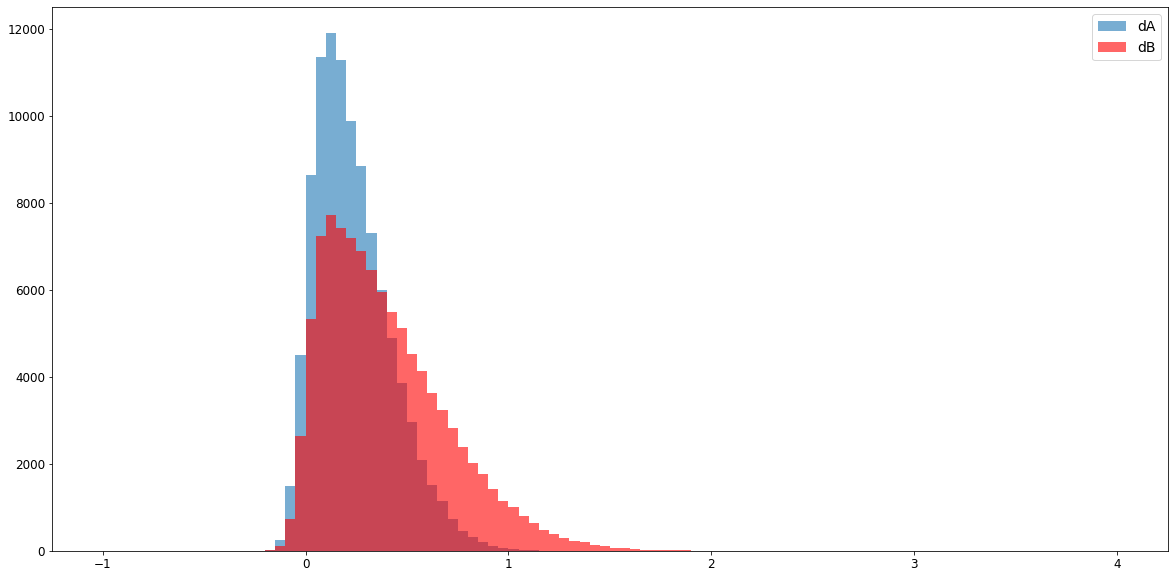

In [761]:
plt.rcParams["figure.figsize"] = (20,10)
dA  = randn_skew_fast(NUM_SAMPLES, 5,scale=0.3)
dB  = randn_skew_fast(NUM_SAMPLES, 9,scale=0.5)
l = -1
u = 4
plt.hist(dA,bins=100,range=(l,u),alpha=0.6,label="dA")
plt.hist(dB,bins=100,range=(l,u),alpha=0.6,color='r',label="dB")
plt.legend()
plt.show()

#### Strategy B

In [762]:
M = 10
THRESH = 0.51
stat = np.min
out = prop_sample_PH1(dA,dB,budget=200)

In [763]:
out

{'ph1': 0.705,
 'varA': 0.03499661180701227,
 'varB': 0.0927885377488985,
 'sA': 5,
 'sB': 13,
 'edA': 20,
 'edB': 52,
 'kA': 4,
 'kB': 4}

#### Strategy A

In [764]:
M = 1
THRESH = 0.51
stat = np.min
out = prop_sample_PH1(dA,dB,budget=200)

In [765]:
out

{'ph1': 0.355,
 'varA': 0.03499661180701227,
 'varB': 0.0927885377488985,
 'sA': 5,
 'sB': 13,
 'edA': 20,
 'edB': 52,
 'kA': 20,
 'kB': 52}

#### Strategy comparision for Varying budget

In [766]:
M = 10
THRESH = 0.51
stat = np.min
ps_y1 = []
budget = [b for b in range(50,550,50)]
for b in budget:
    out = prop_sample_PH1(dA,dB,budget=b)
    ps_y1.append(out["ph1"])

In [767]:
M = 1
THRESH = 0.51
stat = np.min
ps_y1A = []
budget = [b for b in range(50,550,50)]
for b in budget:
    out = prop_sample_PH1(dA,dB,budget=b)
    ps_y1A.append(out["ph1"])

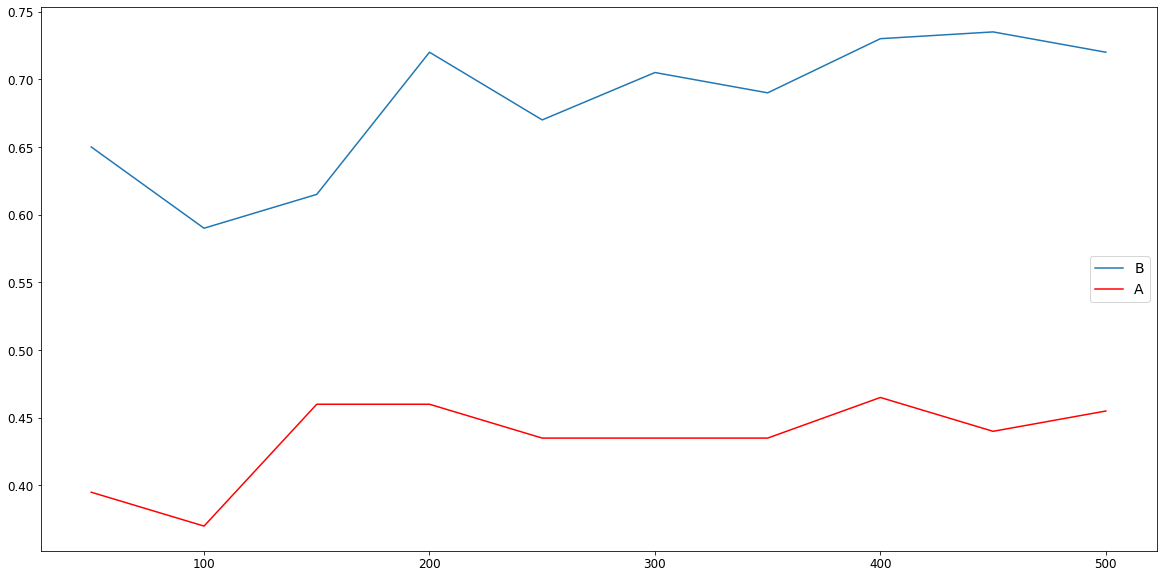

In [768]:
plt.plot(budget,ps_y1,label="B")
plt.plot(budget,ps_y1A,'r',label="A")
plt.legend(loc="right")
plt.show()

### Example 2 - Inconsistent opinion

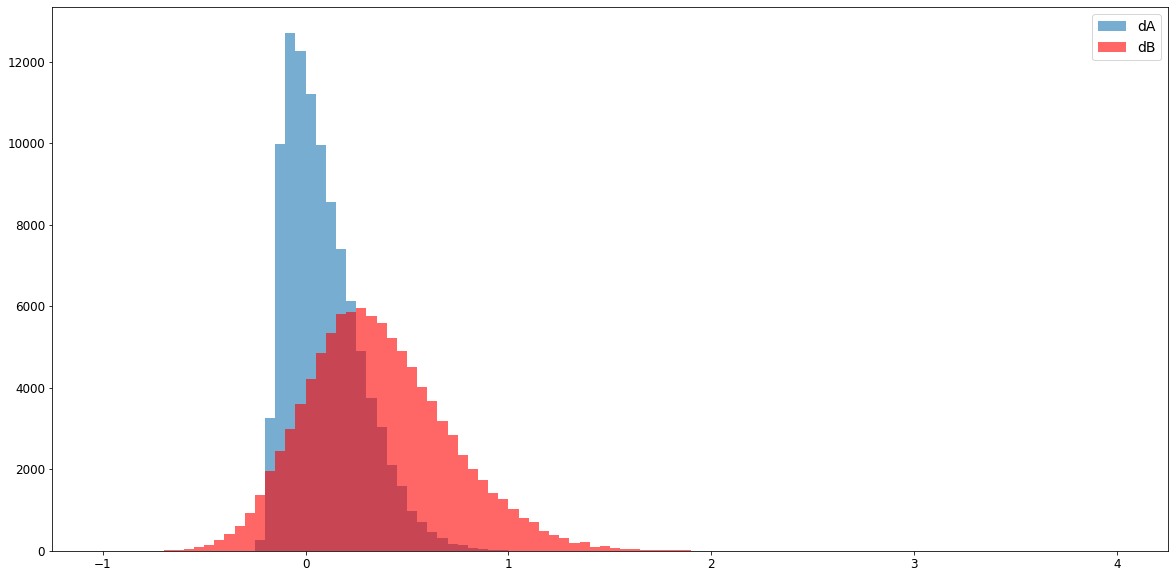

In [769]:
plt.rcParams["figure.figsize"] = (20,10)
dA  = randn_skew_fast(NUM_SAMPLES, 9,scale=0.3,loc=-0.15)
dB  = randn_skew_fast(NUM_SAMPLES, 2,scale=0.5)
l = -1
u = 4
plt.hist(dA,bins=100,range=(l,u),alpha=0.6,label="dA")
plt.hist(dB,bins=100,range=(l,u),alpha=0.6,color='r',label="dB")
plt.legend()
plt.show()

#### Strategy B

In [751]:
M = 10
THRESH = 0.51
stat = np.min
out = prop_sample_PH1(dA,dB,budget=250)

In [750]:
out

{'ph1': 0.79,
 'varA': 0.03377109729598997,
 'varB': 0.12349834040167056,
 'sA': 5,
 'sB': 18,
 'edA': 50,
 'edB': 180,
 'kA': 4,
 'kB': 4}

#### Strategy A

In [745]:
M = 1
THRESH = 0.60
stat = np.min
out = prop_sample_PH1(dA,dB,budget=250)

In [746]:
out

{'ph1': 0.01,
 'varA': 0.03377109729598997,
 'varB': 0.12349834040167056,
 'sA': 5,
 'sB': 18,
 'edA': 25,
 'edB': 90,
 'kA': 25,
 'kB': 90}

#### Strategy comparision for Varying budget

In [757]:
M = 10
THRESH = 0.51
stat = np.min
ps_y = []
budget = [b for b in range(50,550,50)]
for b in budget:
    out = prop_sample_PH1(dA,dB,budget=b)
    ps_y.append(out["ph1"])

In [759]:
M = 1
THRESH = 0.51
stat = np.min
ps_yA = []
budget = [b for b in range(50,550,50)]
for b in budget:
    out = prop_sample_PH1(dA,dB,budget=b)
    ps_yA.append(out["ph1"])

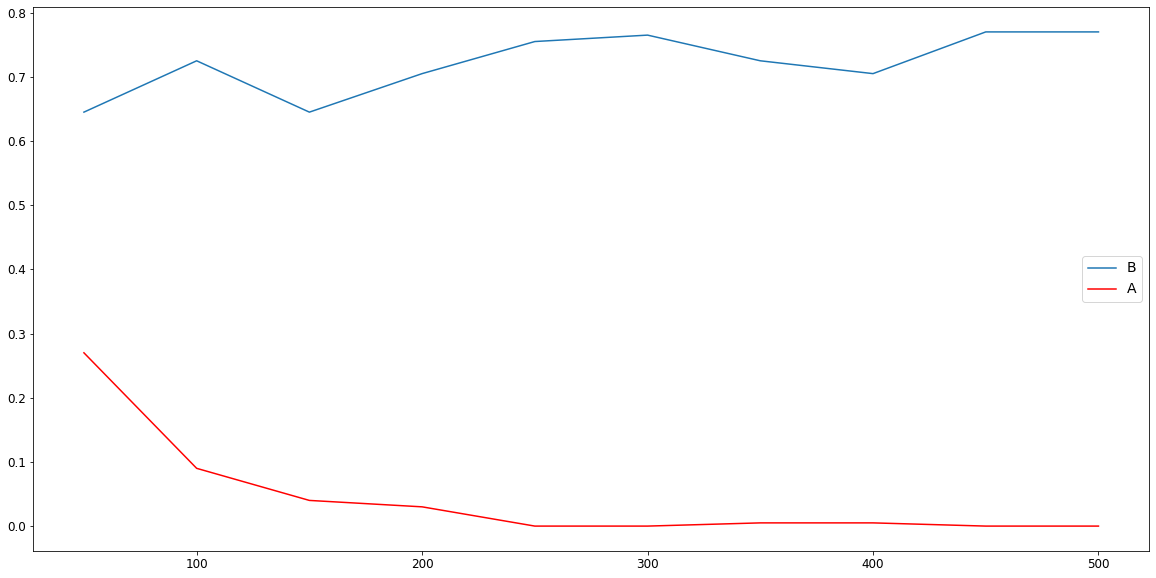

In [760]:
plt.plot(budget,ps_y,label="B")
plt.plot(budget,ps_yA,'r',label="A")
plt.legend(loc="right")
plt.show()